In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

import matplotlib.pyplot as plt 
plt.matshow(digits.images[0]) 
plt.show() 


(1797, 64)


<Figure size 480x480 with 1 Axes>

In [3]:
import numpy as np
from sklearn.datasets import make_friedman1
from sklearn.decomposition import MiniBatchSparsePCA

transformer = MiniBatchSparsePCA(n_components=30, alpha=20, random_state=0)
transformer.fit(digits.data)

X_transformed = transformer.transform(digits.data)
X_transformed.shape

# most values in the components_ are zero (sparsity)
print(transformer.components_.shape)


(30, 64)


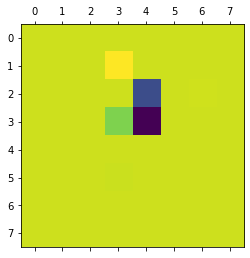

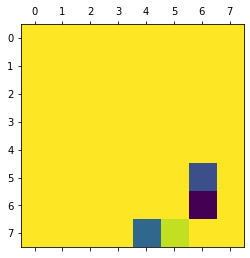

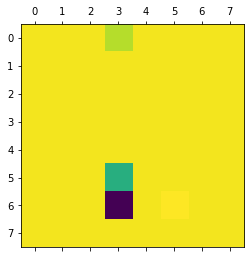

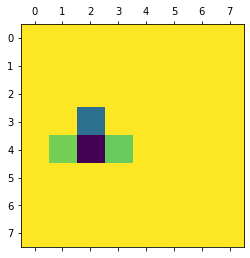

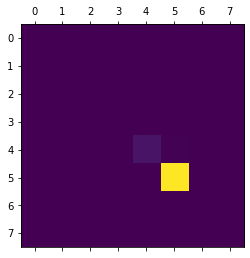

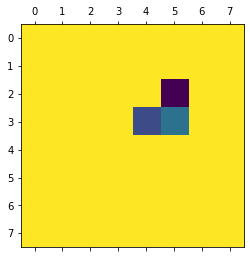

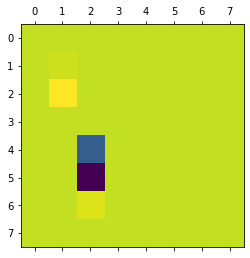

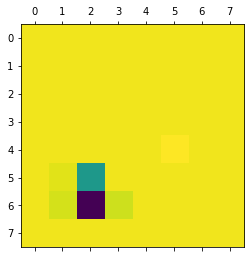

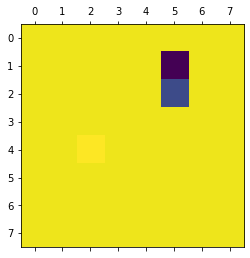

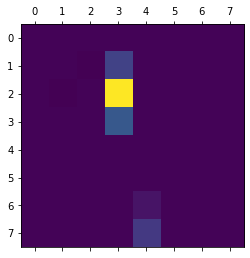

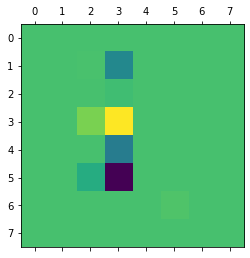

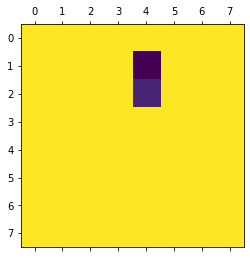

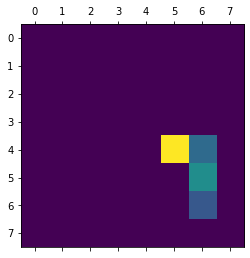

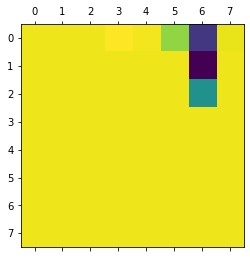

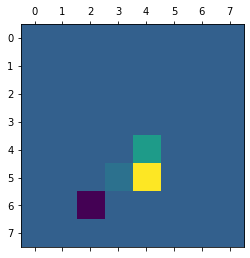

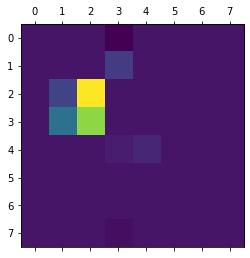

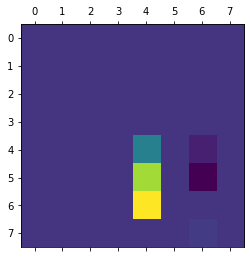

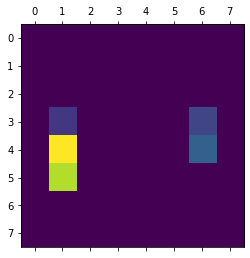

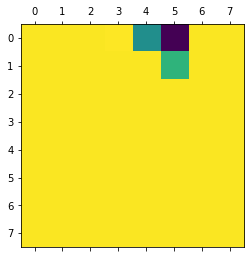

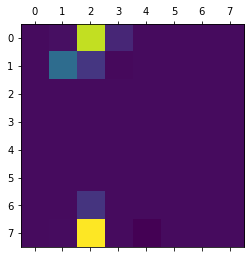

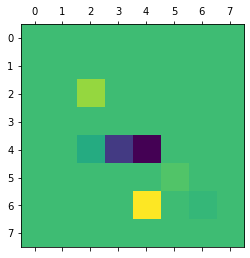

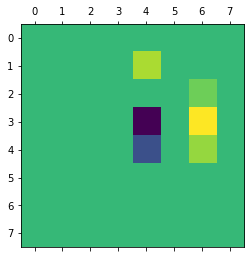

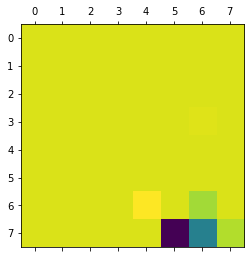

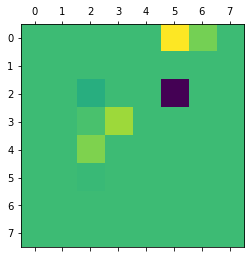

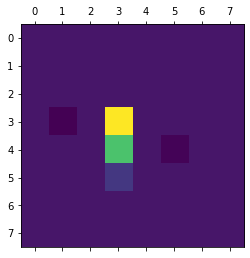

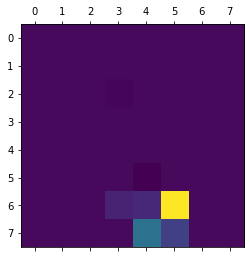

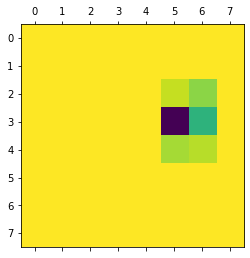

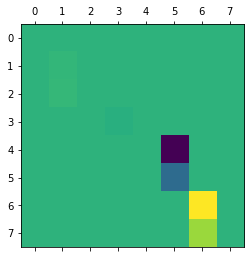

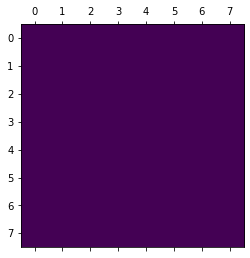

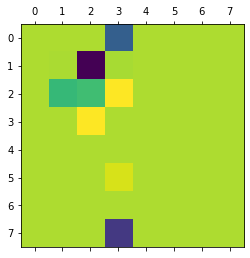

In [4]:
for i in range(0,30):
    plt.matshow(np.reshape(transformer.components_[i,:], (8,8))) 
    plt.show()


In [61]:
y=digits.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.33, random_state=42)


In [62]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)

print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

           0       0.98      1.00      0.99        55
           1       0.98      1.00      0.99        55
           2       1.00      0.98      0.99        52
           3       0.93      0.96      0.95        56
           4       0.98      1.00      0.99        64
           5       0.99      0.99      0.99        73
           6       1.00      0.98      0.99        57
           7       1.00      0.97      0.98        62
           8       0.94      0.90      0.92        52
           9       0.97      0.99      0.98        68

    accuracy                           0.98       594
   macro avg       0.98      0.98      0.98       594
weighted avg       0.98      0.98      0.98       594



In [33]:
data_path = "mnist/"
train_data = np.loadtxt(data_path + "mnist_train.csv", 
                        delimiter=",")
test_data = np.loadtxt(data_path + "mnist_test.csv", 
                       delimiter=",") 


In [67]:

train_imgs = np.asfarray(train_data[:, 1:]) 
test_imgs = np.asfarray(test_data[:, 1:]) 

y_train = np.asfarray(train_data[:, :1])
y_test = np.asfarray(test_data[:, :1])


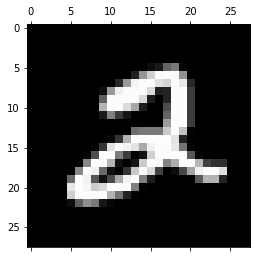

In [44]:
plt.matshow(np.reshape(train_imgs[5,:], (28,28))) 
plt.show()


In [78]:
transformer = MiniBatchSparsePCA(n_components=20, random_state=0, alpha=1000)
transformer.fit(train_imgs)

X_train = transformer.transform(train_imgs)
X_test = transformer.transform(test_imgs)

X_train.shape




(60000, 10)

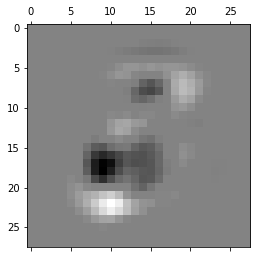

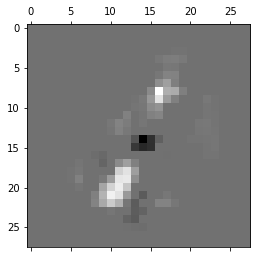

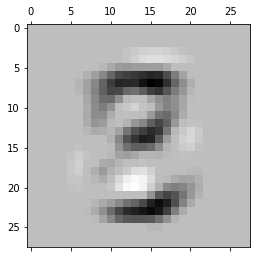

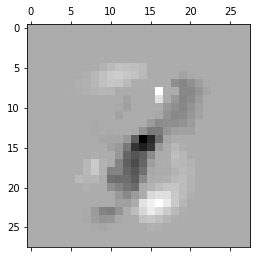

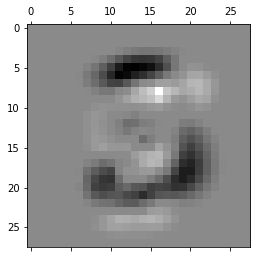

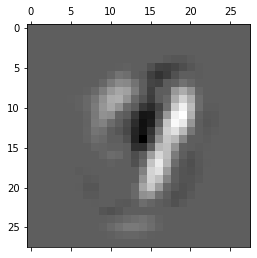

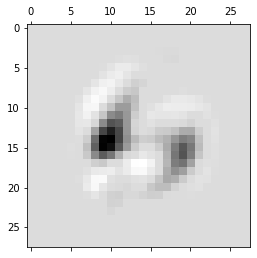

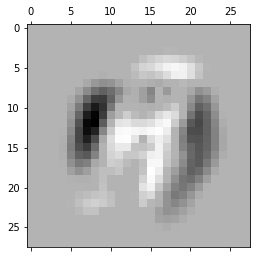

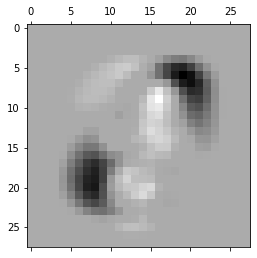

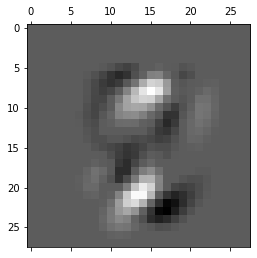

In [79]:
for i in range(0,10):
    plt.matshow(np.reshape(transformer.components_[i,:], (28,28))) 
    plt.show()


In [80]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)

print(classification_report(y_test,y_pred))


/home/april/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95       980
         1.0       0.98      0.98      0.98      1135
         2.0       0.93      0.89      0.91      1032
         3.0       0.78      0.93      0.85      1010
         4.0       0.85      0.88      0.87       982
         5.0       0.90      0.78      0.84       892
         6.0       0.95      0.95      0.95       958
         7.0       0.95      0.89      0.92      1028
         8.0       0.92      0.82      0.87       974
         9.0       0.81      0.85      0.83      1009

    accuracy                           0.90     10000
   macro avg       0.90      0.89      0.90     10000
weighted avg       0.90      0.90      0.90     10000

